# DECam ToO Ledger Maker

Scrape the DECam Texas A&M target identification page for ToOs.

In [1]:
from bs4 import BeautifulSoup
import requests
import os
import pandas as pd
import json

In [2]:
from astropy.time import Time

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
mpl.rc('font', size=16)

## Access Transient Data

Grab data from the tamu.edu webpage. Note that for some reason the website's SSL certificate is giving the `requests` library issues, even though Chrome has no problem with it.

In [4]:
def access_decam_data(url, overwrite=False):
    """Download reduced DECam transient data from Texas A&M.
    Cache the data to avoid lengthy and expensive downloads.
    
    Parameters
    ----------
    url : str
        URL for accessing the data.
    overwrite : bool
        Download new data and overwrite the cached data.
        
    Returns
    -------
    decam_transients : pandas.DataFrame
        Table of transient data.
    """
    folders = url.split('/')
    thedate = folders[-1] if len(folders[-1]) > 0 else folders[-2]
    outfile = '{}.csv'.format(thedate)
    
    if os.path.exists(outfile) and not overwrite:
        # Access cached data.
        decam_transients = pd.read_csv(outfile)
    else:
        # Download the DECam data index.
        # A try/except is needed because the datahub SSL certificate isn't playing well with URL requests.
        try:
            decam_dets = requests.get(url).text
        except:
            requests.packages.urllib3.disable_warnings(requests.packages.urllib3.exceptions.InsecureRequestWarning)
            decam_dets = requests.get(url, verify=False).text
            
        # Convert transient index page into scrapable data using BeautifulSoup.
        soup = BeautifulSoup(decam_dets)
        
        # Loop through transient object summary JSON files indexed in the main transient page.
        # Download the JSONs and dump the info into a Pandas table.
        decam_transients = None
        j = 0

        for a in soup.find_all('a', href=True):
            if 'object-summary.json' in a:
                link = a['href'].replace('./', '')
                summary_url  = url + link        
                summary_text = requests.get(summary_url, verify=False).text
                summary_data = json.loads(summary_text)

                j += 1
                print('Accessing {:3d}  {}'.format(j, summary_url))

                if decam_transients is None:
                    decam_transients = pd.DataFrame(summary_data, index=[0])
                else:
                    decam_transients = pd.concat([decam_transients, pd.DataFrame(summary_data, index=[0])])
                    
        # Cache the data for future access.
        print('Saving output to {}'.format(outfile))
        decam_transients.to_csv(outfile, index=False)
        
    return decam_transients

In [5]:
decam_transients = access_decam_data('https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/')

Accessing   1  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/A202103221406345m013845/object-summary.json
Accessing   2  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/A202103221407081m012201/object-summary.json
Accessing   3  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/A202103221407344m002429/object-summary.json
Accessing   4  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/A202103221409524m022116/object-summary.json
Accessing   5  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/A202103221410106m031223/object-summary.json
Accessing   6  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/A202103221410551m025503/object-summary.json
Accessing   7  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/A202103221412460m002805/object-summary.json
Accessing   8  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/A202103221413573m024259/object-summary.json
Accessing   9  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/A20210322

Accessing  74  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/T202103221413040m021920/object-summary.json
Accessing  75  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/T202103221413231m024943/object-summary.json
Accessing  76  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/T202103221413427m023543/object-summary.json
Accessing  77  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/T202103221415354m032142/object-summary.json
Accessing  78  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/T202103221415411m022320/object-summary.json
Accessing  79  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/T202103221415416m022326/object-summary.json
Accessing  80  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/T202103221415577m033639/object-summary.json
Accessing  81  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/T202103221416250m034916/object-summary.json
Accessing  82  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/T20210322

Accessing 147  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/T202103221435254p000301/object-summary.json
Accessing 148  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/T202103221435370m032007/object-summary.json
Accessing 149  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/T202103221435451m011314/object-summary.json
Accessing 150  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/T202103221436160m015059/object-summary.json
Accessing 151  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/T202103221436169m040845/object-summary.json
Accessing 152  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/T202103221436374m001458/object-summary.json
Accessing 153  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/T202103221436531p015645/object-summary.json
Accessing 154  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/T202103221437186m032832/object-summary.json
Accessing 155  https://datahub.geos.tamu.edu:8000/decam/20210324_2Dets/T20210322

## Access the Transients Table

Dump the info from the transients table here.

If there are particular objects of interest, put them into a ToO ledger for fiberassign.

In [6]:
decam_transients

,ObjectID,RA-OBJECT,DEC-OBJECT,NumberAlerts,MaxSCORE,RA-PSEUDO-HOST,DEC-PSEUDO-HOST,SEP-PSEUDO-HOST,RA-NEIGHBOR-STAR,DEC-NEIGHBOR-STAR,...,Discovery-Round,Discovery-Time,Discovery-Filter,Discovery-Magnitude,Discovery-SNR,Latest-Round,Latest-Time,Latest-Filter,Latest-Magnitude,Latest-SNR
0,A202103221406345m013845,211.6439,-1.6459,2,0.996,211.6439,-1.6459,0.17,211.6434,-1.6445,...,0,2021-03-22T08:14:02.747,N,20.46,44.2,0,2021-03-22T08:19:29.179,N,21.86,23.3
0,A202103221407081m012201,211.7840,-1.3671,2,0.869,211.7840,-1.3671,0.12,211.7792,-1.3667,...,0,2021-03-22T08:14:02.747,S,21.66,16.5,0,2021-03-22T08:19:29.179,S,22.01,21.2
0,A202103221407344m002429,211.8936,-0.4083,2,0.762,211.8936,-0.4084,0.38,211.8967,-0.4088,...,0,2021-03-22T06:40:19.074,N,21.63,32.5,0,2021-03-22T06:42:18.104,N,21.77,25.0
0,A202103221409524m022116,212.4685,-2.3546,2,0.999,212.4684,-2.3546,0.15,212.4679,-2.3529,...,0,2021-03-22T08:14:02.747,N,20.09,67.1,0,2021-03-22T08:19:29.179,N,20.65,59.5
0,A202103221410106m031223,212.5445,-3.2065,3,0.906,212.5445,-3.2065,0.04,212.5455,-3.2057,...,0,2021-03-22T08:20:58.209,N,21.73,28.3,0,2021-03-22T08:24:25.508,N,22.03,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,T202103221453214m013520,223.3396,-1.5891,2,0.961,223.3404,-1.5875,6.61,223.3438,-1.5888,...,0,2021-03-22T07:26:55.981,S,21.94,25.6,0,2021-03-22T07:28:54.058,S,21.70,17.0
0,T202103221453427m020552,223.4282,-2.0979,2,0.921,223.4302,-2.0990,8.05,223.4300,-2.0970,...,0,2021-03-22T07:26:55.981,N,21.94,24.7,0,2021-03-22T07:28:54.058,N,21.79,13.3
0,T202103221453487m012404,223.4530,-1.4014,2,0.986,223.4526,-1.4034,7.42,223.4523,-1.3988,...,0,2021-03-22T07:26:55.981,S,21.26,47.0,0,2021-03-22T07:28:54.058,S,21.09,27.8
0,T202103221454005m033559,223.5024,-3.6000,3,0.970,223.5034,-3.5952,17.38,223.5007,-3.5996,...,0,2021-03-22T09:02:33.329,N,22.11,24.5,0,2021-03-22T09:06:02.345,N,21.21,12.3


In [7]:
# List of interesting transient IDs from Lifan:
prio = ['A202103221407344m002429',
        'A202103221431564m034803',
        'A202103221435010m003706',
        'A202103221436465m021102',
        'A202103221437106m015403',
        'A202103221437113m015135',
        'A202103221438475m000805',
        'A202103221439065m001505',
        'A202103221442037p000433',
        'A202103221446040p001624',
        'A202103221450366m011313',
        'A202103221451599m022903',
        'A202103221452176m023029',
        'A202103221452234p001407',
        'T202103221428364p001900',
        'T202103221429023p023342',
        'T202103221422216m001038',
        'T202103221436169m040845']

select = decam_transients['ObjectID'].isin(prio)

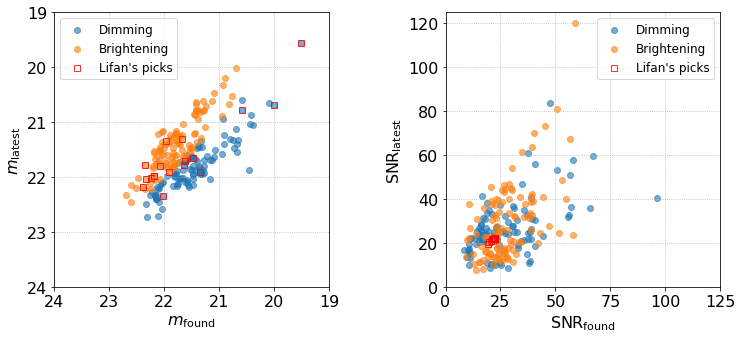

In [8]:
mag_found  = decam_transients['Discovery-Magnitude']
mag_latest = decam_transients['Latest-Magnitude']
snr_found  = decam_transients['Discovery-SNR']
snr_latest = decam_transients['Latest-SNR']

dimmer = mag_latest > mag_found
brighter = np.logical_not(dimmer)

fig, axes = plt.subplots(1,2, figsize=(11,5))

ax = axes[0]
ax.scatter(mag_found[dimmer], mag_latest[dimmer], alpha=0.6, label='Dimming')
ax.scatter(mag_found[brighter], mag_latest[brighter], alpha=0.6, label='Brightening')
ax.scatter(mag_found[select], mag_latest[select], marker='s', edgecolors='r', facecolors='None', alpha=0.8, label="Lifan's picks")
ax.set(aspect='equal',
       xlim=(24,19),#ax.get_xlim()[::-1],
       xlabel=r'$m_{\mathrm{found}}$',
       ylim=(24,19),#ax.get_ylim()[::-1],
       ylabel=r'$m_{\mathrm{latest}}$')
lgd = ax.legend(fontsize=12)
ax.grid(ls=':')

ax = axes[1]
ax.scatter(snr_found[dimmer], snr_latest[dimmer], alpha=0.6, label='Dimming')
ax.scatter(snr_found[brighter], snr_latest[brighter], alpha=0.6, label='Brightening')
ax.scatter(mag_found[select], mag_latest[select], marker='s', edgecolors='r', facecolors='None', alpha=0.8, label="Lifan's picks")
ax.set(aspect='equal',
       xlim=(0,125),
       xlabel=r'$\mathrm{SNR}_{\mathrm{found}}$',
       ylim=(0,125),
       ylabel=r'$\mathrm{SNR}_{\mathrm{latest}}$')
lgd = ax.legend(fontsize=12)
ax.grid(ls=':')
fig.tight_layout();

## Write ToO Ledger

Using the format documented in `/global/cscratch1/sd/adamyers/ToO/dr9/0.50.0.dev4501/ToO/ToO-input.ecsv`, create a list of targets to append to the main ToO ledger.

These will all be in FIBER mode.

In [9]:
lifans_picks = decam_transients[select]
lifans_picks

for idx, row in lifans_picks.iterrows():
    # Ledger format:
    # datatype:
    # - {name: RA, unit: deg, datatype: float64}
    # - {name: DEC, unit: deg, datatype: float64}
    # - {name: PMRA, unit: mas / yr, datatype: float32}
    # - {name: PMDEC, unit: mas / yr, datatype: float32}
    # - {name: REF_EPOCH, unit: yr, datatype: float32}
    # - {name: CHECKER, datatype: string}
    # - {name: TOO_TYPE, datatype: string}
    # - {name: OCLAYER, datatype: string}
    # - {name: MJD_BEGIN, unit: d, datatype: float64}
    # - {name: MJD_END, unit: d, datatype: float64}
    ra = row['RA-OBJECT']
    dec = row['DEC-OBJECT']
    t_disc = Time(row['Discovery-Time'], format='isot', scale='utc')
    t_last = Time(row['Latest-Time'], format='isot', scale='utc')
    
    mag_found  = row['Discovery-Magnitude']
    mag_latest = row['Latest-Magnitude']
    prog = 'BRIGHT' if mag_latest < 21 else 'DARK'
    
    epoch = 2000.0
    
    print('{:<10.6f} {:>10.6f} {:>9.6f} {:>9.6f} {:>7.1f}  LW  FIBER  {:7s} {:>15.8f} {:>15.8f}'.format(
            ra, dec, 0, 0, epoch, prog, t_disc.mjd, t_last.mjd+14))
#     print(ra, dec, 0., 0., 2015.5, 'SB', 'FIBER', 'BRIGHT', )

211.893600  -0.408300  0.000000  0.000000  2000.0  LW  FIBER  DARK     59295.27799854  59309.27937620
217.985400  -3.800900  0.000000  0.000000  2000.0  LW  FIBER  DARK     59295.36234487  59309.36475286
218.754300  -0.618500  0.000000  0.000000  2000.0  LW  FIBER  DARK     59295.29731266  59309.29868245
219.193800  -2.184000  0.000000  0.000000  2000.0  LW  FIBER  DARK     59295.32625303  59309.32763991
219.294400  -1.900800  0.000000  0.000000  2000.0  LW  FIBER  DARK     59295.32384017  59309.32625303
219.297400  -1.859900  0.000000  0.000000  2000.0  LW  FIBER  DARK     59295.32625303  59309.32763991
219.698100  -0.134800  0.000000  0.000000  2000.0  LW  FIBER  BRIGHT   59295.29489366  59309.29868245
219.777200  -0.251600  0.000000  0.000000  2000.0  LW  FIBER  DARK     59295.29489366  59309.29868245
220.515800   0.075800  0.000000  0.000000  2000.0  LW  FIBER  DARK     59295.29969505  59309.30071823
221.517100   0.273400  0.000000  0.000000  2000.0  LW  FIBER  DARK     59295.30071